In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

#for machine learning
import sklearn 
import imblearn #use pip install imbalanced-learn --user on anaconda prompt
 

In [4]:
data = pd.read_csv('LoanData.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
data.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002407,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [7]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [8]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
#imputation of categorical columns using mode 
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])  
data['Married']=data['Married'].fillna(data['Married'].mode()[0])
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode()[0])

#imputation of numerical columns using median
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].median())
data['CoapplicantIncome']=data['Credit_History'].fillna(data['Credit_History'].median())


In [10]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

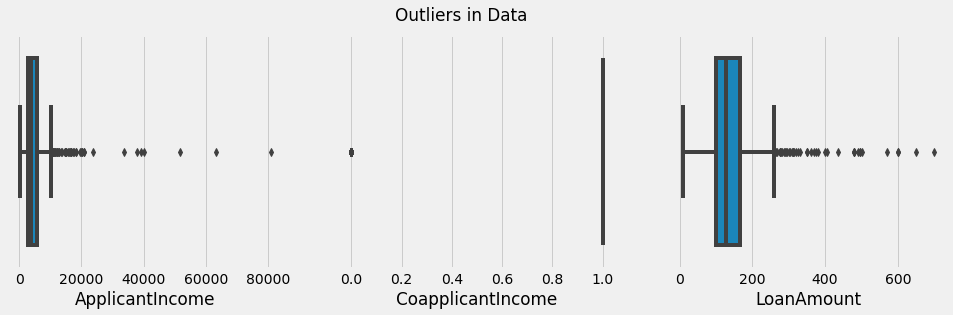

Before Removing Outliers  (614, 13)
After Removing Outliers  (607, 13)


In [11]:
#visualizing plots using box plot 

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(1,3,1)
sns.boxplot(data['ApplicantIncome'])

plt.subplot(1,3,2)
sns.boxplot(data['CoapplicantIncome'])

plt.subplot(1,3,3)
sns.boxplot(data['LoanAmount'])

plt.suptitle('Outliers in Data')
plt.show()#removing outliers from data 
print("Before Removing Outliers ", data.shape)
data = data[data['ApplicantIncome'] < 25000]
print("After Removing Outliers ", data.shape)

In [12]:
#removing outliers from data 

print("Before Removing Outliers ", data.shape)
data = data[data['ApplicantIncome'] < 25000]  #lets remove the customers having more than 25000 Application Income 
print("After Removing Outliers ", data.shape)

Before Removing Outliers  (607, 13)
After Removing Outliers  (607, 13)


In [13]:
print("Before Removing Outliers ", data.shape)
data = data[data['CoapplicantIncome'] < 10000]
print("After Removing Outliers ", data.shape)


Before Removing Outliers  (607, 13)
After Removing Outliers  (607, 13)


In [14]:
print("Before Removing Outliers ", data.shape)
data = data[data['LoanAmount'] < 400]
print("After Removing Outliers ", data.shape)

Before Removing Outliers  (607, 13)
After Removing Outliers  (595, 13)


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


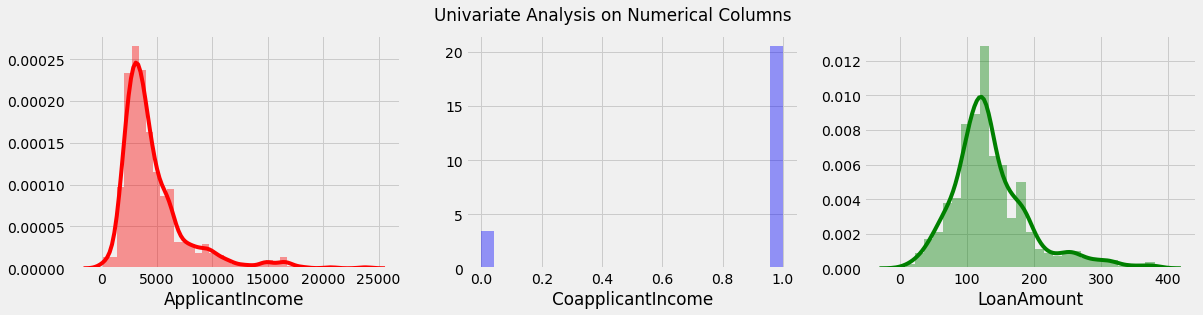

In [15]:

plt.rcParams['figure.figsize'] = (18, 4)
plt.subplot(1,3, 1)
sns.distplot(data['ApplicantIncome'], color = 'red')

plt.subplot(1,3, 2)
sns.distplot(data['CoapplicantIncome'], color = 'blue')

plt.subplot(1,3, 3)
sns.distplot(data['LoanAmount'], color = 'green')

plt.suptitle('Univariate Analysis on Numerical Columns')
plt.show()


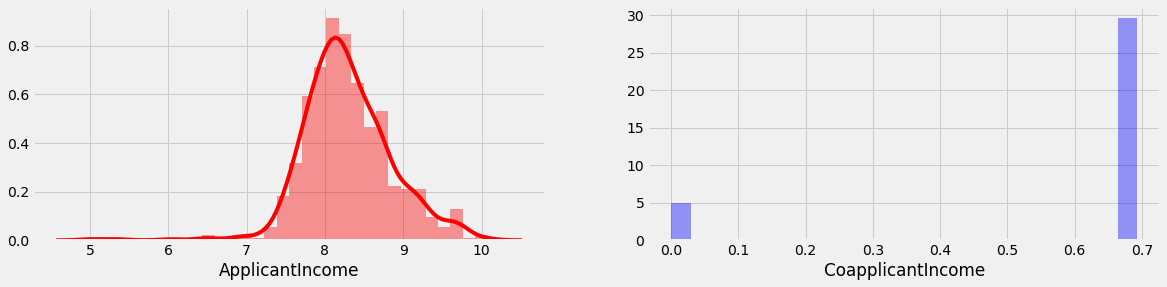

In [16]:
#removing skewness as it can add bias to the data 

import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (18, 4)

#Apply log transformation to remove skewness 
data['ApplicantIncome'] = np.log(data['ApplicantIncome'])
data['CoapplicantIncome'] = np.log1p(data['CoapplicantIncome'])

#Lets plot them and check whether the skewness is removed or not 
plt.subplot(1,2,1)
sns.distplot(data['ApplicantIncome'], color= 'red')

plt.subplot(1,2,2)
sns.distplot(data['CoapplicantIncome'], color='blue')

plt.show()


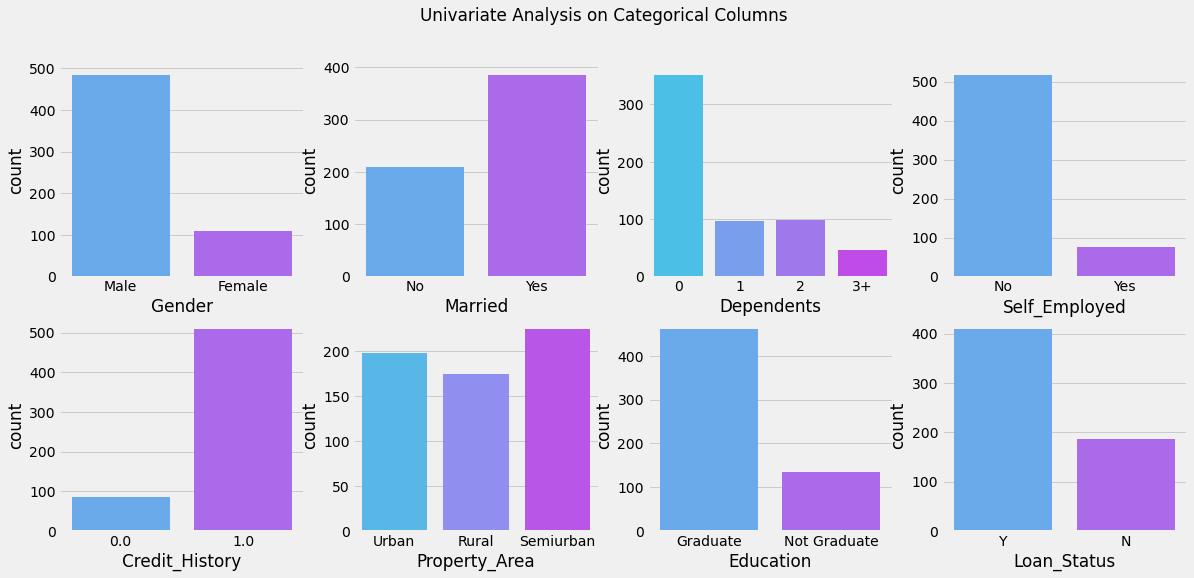

In [17]:
plt.rcParams['figure.figsize']=(18,8)

plt.subplot(2,4,1)
sns.countplot(data['Gender'], palette = 'cool')

plt.subplot(2,4,2)
sns.countplot(data['Married'], palette = 'cool')

plt.subplot(2, 4, 3)
sns.countplot(data['Dependents'], palette = 'cool')

plt.subplot(2, 4, 4)
sns.countplot(data['Self_Employed'], palette = 'cool')

plt.subplot(2, 4, 5)
sns.countplot(data['Credit_History'], palette = 'cool')

plt.subplot(2, 4, 6)
sns.countplot(data['Property_Area'], palette = 'cool')

plt.subplot(2, 4, 7)
sns.countplot(data['Education'], palette = 'cool')

plt.subplot(2, 4, 8)
sns.countplot(data['Loan_Status'], palette = 'cool')

plt.suptitle('Univariate Analysis on Categorical Columns')
plt.show()


## Bivariate Data Analysis 

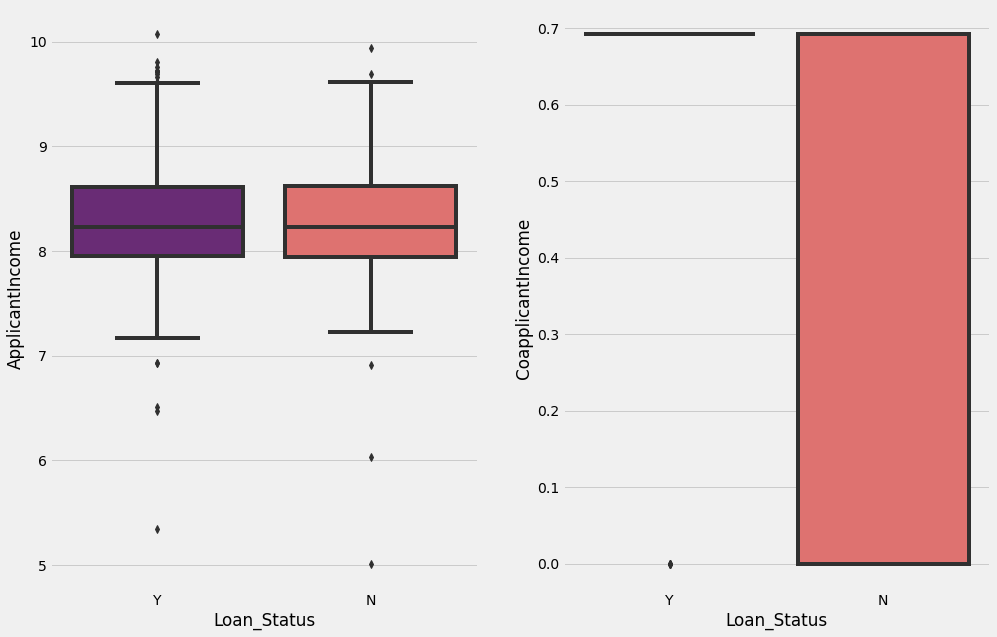

In [18]:
#Impact of Income of Applicant and Co-applicant on Loan Status 

plt.rcParams['figure.figsize']=(15,10)

plt.subplot(1,2,1)
sns.boxplot(data['Loan_Status'], data['ApplicantIncome'], palette = 'magma')


plt.subplot(1,2,2)
sns.boxplot(data['Loan_Status'], data['CoapplicantIncome'], palette = 'magma')

plt.show()

In [19]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

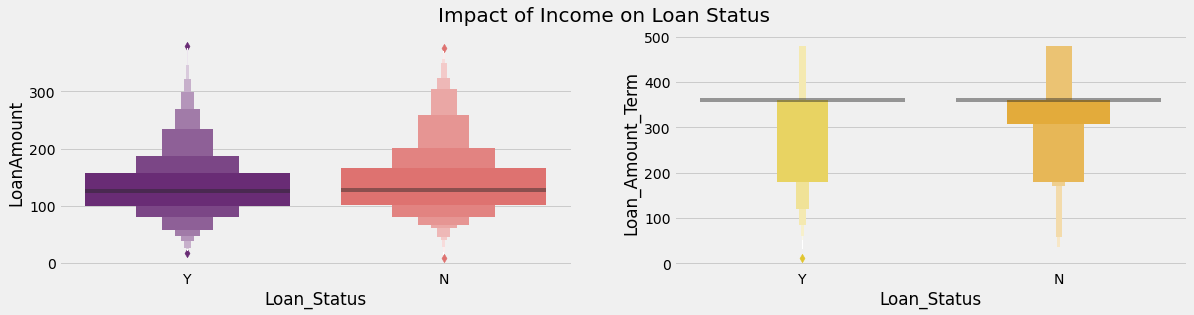

In [20]:
#Impact of Loan Amount and Loan Amount Term on Loan Status 
plt.rcParams['figure.figsize']=(18,4)

plt.subplot(1,2,1)
sns.boxenplot(data['Loan_Status'] , data['LoanAmount'], palette='magma')

plt.subplot(1, 2, 2)
sns.boxenplot(data['Loan_Status'], data['Loan_Amount_Term'], palette = 'Wistia')

plt.suptitle('Impact of Income on Loan Status\n', fontsize = 20)
plt.show()


### Comparing Categorical columns to the Target Column 

In [21]:
#Let's compare all the categories with respect to the loan status to understand overall Impact 

print("Impact of Marriage on Loan Status")
print(pd.crosstab(data['Loan_Status'], data['Married']))
print('\n')

print("Impact of Dependents on Loan Status")
print(pd.crosstab(data['Loan_Status'], data['Dependents']))
print('\n')

print("Impact of Education on Loan Status")
print(pd.crosstab(data['Loan_Status'], data['Education']))
print('\n')

print("Impact of Employment on Loan Status")
print(pd.crosstab(data['Loan_Status'], data['Self_Employed']))
print('\n')

print("Impact of Property on Loan Status")
print(pd.crosstab(data['Loan_Status'], data['Property_Area']))

Impact of Marriage on Loan Status
Married       No  Yes
Loan_Status          
N             78  108
Y            131  278


Impact of Dependents on Loan Status
Dependents     0   1   2  3+
Loan_Status                 
N            111  34  25  16
Y            241  63  74  31


Impact of Education on Loan Status
Education    Graduate  Not Graduate
Loan_Status                        
N                 134            52
Y                 327            82


Impact of Employment on Loan Status
Self_Employed   No  Yes
Loan_Status            
N              160   26
Y              358   51


Impact of Property on Loan Status
Property_Area  Rural  Semiurban  Urban
Loan_Status                           
N                 66         52     68
Y                108        172    129


## Data Preparation

In [22]:
# lets check the columns which are of object data types
data.select_dtypes('object').head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [23]:
print('Before Deleting Columns: ', data.shape)

data = data.drop(['Loan_ID'], axis=1)

print('After Deleting Columns: ', data.shape)

Before Deleting Columns:  (595, 13)
After Deleting Columns:  (595, 12)


In [24]:
#Let's Encode other columns 
data['Gender']=data['Gender'].replace(('Male','Female'), (1,0))
data['Married'] = data['Married'].replace(('Yes', 'No'), (1,0))
data['Education'] = data['Education'].replace(('Graduate', 'Not Graduate'), (1,0))

In [25]:
data['Self_Employed'] = data['Self_Employed'].replace(('Yes','No'), (1, 0))
data['Loan_Status'] = data['Loan_Status'].replace(('Y','N'), (1, 0))

# Urban and Semi Urban Property have very similar Impact on Loan Status, so, we will merge them together
data['Property_Area'] = data['Property_Area'].replace(('Urban','Semiurban', 'Rural'),(1, 1, 0))

# as seen above that apart from 0 dependents, all are similar hence, we merge them to avoid any confusion
data['Dependents'] = data['Dependents'].replace(('0', '1', '2', '3+'), (0, 1, 1, 1))

# lets check whether there is any object column left
data.select_dtypes('object').columns

Index([], dtype='object')

In [26]:
#Let's split data into Target column 

y = data['Loan_Status']
x = data.drop(['Loan_Status'], axis=1)

#let's check the shape of x and y
print('Shape of X: ', x.shape)
print('Shape of Y: ', y.shape)

Shape of X:  (595, 11)
Shape of Y:  (595,)


### Resampling for Balancing the data

In [27]:
pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\user\appdata\roaming\python\python38\site-packages (0.24.1)
Note: you may need to restart the kernel to use updated packages.


In [28]:
import scipy
print("NumPy", np.__version__)
print("SciPy", scipy.__version__)
print("Scikit-Learn", sklearn.__version__)
print("Imblearn", imblearn.__version__)

NumPy 1.19.5
SciPy 1.5.0
Scikit-Learn 0.24.1
Imblearn 0.8.0


In [29]:
from imblearn.over_sampling import SMOTE

x_resample, y_resample  = SMOTE().fit_resample(x, y.values.ravel())
print(x_resample.shape)
print(y_resample.shape)

(818, 11)
(818,)


In [31]:
print("Before Resampling :")
print(y.value_counts())

print("After Resampling :")
y_resample = pd.DataFrame(y_resample)
print(y_resample[0].value_counts())

Before Resampling :
1    409
0    186
Name: Loan_Status, dtype: int64
After Resampling :
1    409
0    409
Name: 0, dtype: int64


In [32]:
# Split the test data from the training data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)

# lets print the shapes again 
print("Shape of the x Train :", x_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the x Test :", x_test.shape)
print("Shape of the y Test :", y_test.shape)

Shape of the x Train : (654, 11)
Shape of the y Train : (654, 1)
Shape of the x Test : (164, 11)
Shape of the y Test : (164, 1)


### Machine Learning Modelling 

In [34]:
# lets apply Logistic Regression

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state = 0)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.7614678899082569
Testing Accuracy : 0.7621951219512195


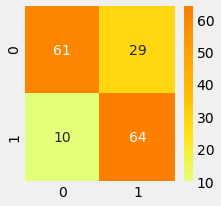

              precision    recall  f1-score   support

           0       0.86      0.68      0.76        90
           1       0.69      0.86      0.77        74

    accuracy                           0.76       164
   macro avg       0.77      0.77      0.76       164
weighted avg       0.78      0.76      0.76       164



In [35]:
# lets analyze the Performance using Confusion matrix

from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.show()

# lets also use classification report for performance analysis
cr = classification_report(y_test, y_pred)
print(cr)

### Analysing Gradient Boosting

In [37]:
# lets apply DecisionTrees

from sklearn.ensemble import GradientBoostingClassifier

model =  GradientBoostingClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.8975535168195719
Testing Accuracy : 0.7804878048780488


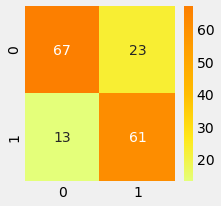

              precision    recall  f1-score   support

           0       0.84      0.74      0.79        90
           1       0.73      0.82      0.77        74

    accuracy                           0.78       164
   macro avg       0.78      0.78      0.78       164
weighted avg       0.79      0.78      0.78       164



In [38]:
# lets analyze the Performance using Confusion matrix

cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.show()

# lets also use classification report for performance analysis
cr = classification_report(y_test, y_pred)
print(cr)

In [39]:
from sklearn.model_selection import cross_val_score

clf = GradientBoostingClassifier(random_state = 0)
scores = cross_val_score(clf, x_train, y_train, cv=10)
print(scores)

[0.78787879 0.86363636 0.83333333 0.78787879 0.81538462 0.84615385
 0.81538462 0.86153846 0.72307692 0.75384615]
